# Lab 6

In this lab we discuss statistical modelling and least squares regression.

## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read .csv data
possum = pd.read_csv("possum.csv")
# The possum dataset consists of morphometric measurements on 46 possums.
possum.head()

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


**stats.linregress:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [3]:
# Building a simple model with only one term
# Simple linear regression is a linear regression model with a single explanatory variable.
model = stats.linregress(x = possum['age'], y = possum['headL'])

In [4]:
# Finding the slope of the regression line
model.slope

0.5631158455392805

In [5]:
# Finding the intercept of the regression line
model.intercept

90.08288948069242

In [6]:
# Finding the correlation coefficient (R)
model.rvalue

0.4011016610119052

In [7]:
# Calculating the R-squared
(model.rvalue ** 2)

0.16088254246650932

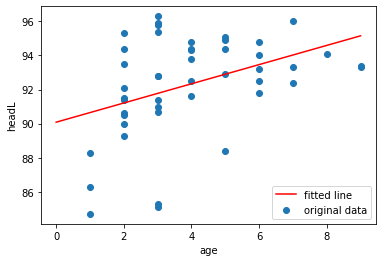

In [8]:
# Plotting the fitted line
X = pd.DataFrame({"age":np.linspace(0, 9, 45)})
y_pred = model.intercept + model.slope * X
plt.scatter(possum['age'], possum['headL'], label = 'original data')
plt.plot(X, y_pred, color = 'red', label = 'fitted line')
plt.xlabel("age")
plt.ylabel("headL")
plt.legend()
plt.show()

**sns.lmplot:** https://seaborn.pydata.org/generated/seaborn.lmplot.html

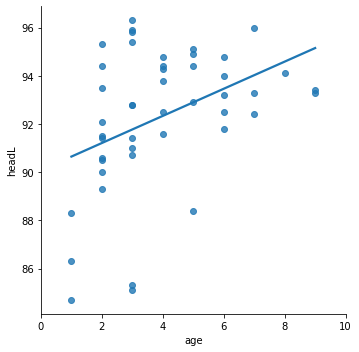

In [9]:
# Alternative way to plot the fitted line
sns.lmplot(x = "age", y = "headL", data = possum, ci = None)
plt.xlim(0,10)
plt.show()

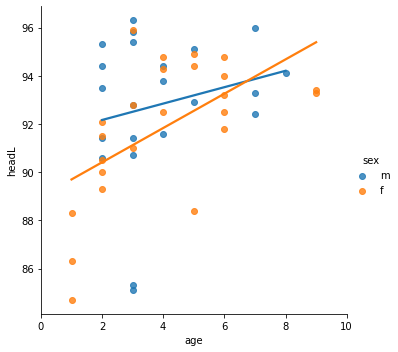

In [10]:
# Plotting two fitted lines, one for female and another for male possums
sns.lmplot(x = "age", y = "headL", data = possum, hue = "sex", ci = None);
plt.xlim(0,10)
plt.show()

## Effect of an Influential Point

In [11]:
# Let's look at the last 5 rows of the original dataset!
# The original dataset has 46 rows and 6 columns.
possum.tail()

,sex,age,headL,skullW,totalL,tailL
41,m,3,85.3,54.1,77.0,32.0
42,f,2,90.0,55.5,81.0,32.0
43,m,3,85.1,51.5,76.0,35.5
44,m,3,90.7,55.9,81.0,34.0
45,m,2,91.4,54.4,84.0,35.0


**pd.DataFrame.copy:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

In [12]:
# Now we would like to add an influential point and see how this affects the regression line.
# We decide to add a point that behaves like an outlier to the bottom of the dataframe.
# Let's add a point representing "age" = 9 and "headL" = 86.
# We call the new dataframe "possum_modified".
possum_modified = possum.copy()
possum_modified.loc[46, 'age'] = 9
possum_modified.loc[46, 'headL'] = 86

In [13]:
# Now let's look at the last 5 rows of the modified dataframe!
possum_modified.tail()

,sex,age,headL,skullW,totalL,tailL
42,f,2.0,90.0,55.5,81.0,32.0
43,m,3.0,85.1,51.5,76.0,35.5
44,m,3.0,90.7,55.9,81.0,34.0
45,m,2.0,91.4,54.4,84.0,35.0
46,NaN,9.0,86.0,NaN,NaN,NaN


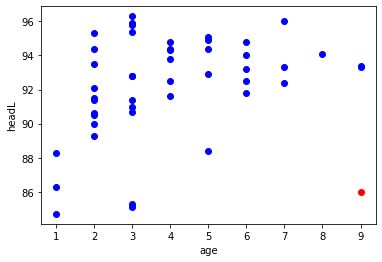

In [14]:
# The new point that is added to the dataframe is identified in red in the scatterplot below.
plt.scatter(possum_modified.loc[0:45, 'age'], possum_modified.loc[0:45, 'headL'], color = 'blue')
plt.scatter(possum_modified.loc[46, 'age'], possum_modified.loc[46, 'headL'], color = 'red')
plt.xlabel("age")
plt.ylabel("headL")
plt.show()

In [15]:
# Building a new model using the modified dataframe
model_modified = stats.linregress(x = possum_modified['age'], y = possum_modified['headL'])

In [16]:
# Finding the slope of the regression line
model_modified.slope

0.3585469261900172

In [17]:
# Finding the intercept of the regression line
model_modified.intercept

90.71952206590865

In [18]:
# Finding the correlation coefficient (R)
model_modified.rvalue

0.2584020565559145

In [19]:
# Calculating the R-squared
(model_modified.rvalue ** 2)

0.06677162283232604

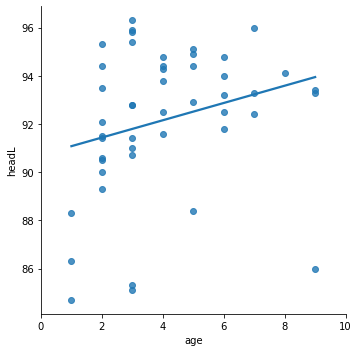

In [20]:
# Plotting the fitted line
sns.lmplot(x = "age", y = "headL", data = possum_modified, ci = None)
plt.xlim(0,10)
plt.show()